In [18]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import linear_model

In [19]:
df = pd.read_csv("./dataset/homeprices.csv")
df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


- we calculate median of the bedroom column and fill up NaN value

In [20]:
import math

median_bdrm = math.floor(df.bedrooms.median())
median_bdrm

4

In [21]:
df.bedrooms = df.bedrooms.fillna(median_bdrm)

In [22]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [23]:
model = linear_model.LinearRegression()
model.fit(df[['area', 'bedrooms', 'age']], df['price'])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
model.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [25]:
model.intercept_

221323.00186540402

In [26]:
y_predict = model.predict([[3000, 3, 40]])
y_predict

/Users/prashankulathunga/miniforge3/envs/tensorflow/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

In [ ]:
# y = m1*x1 + m2*x2 + m3*x3 + c (multiple variables LR)
y = 112.06244194*3000 + 23388.88007794*3 - 3231.71790863*40 + 221323.00186540402
y

498408.25157402403

In [33]:
model.predict([[2500, 4,5]])

/Users/prashankulathunga/miniforge3/envs/tensorflow/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([578876.03748933])

In [34]:
df.columns

Index(['area', 'bedrooms', 'age', 'price'], dtype='object')

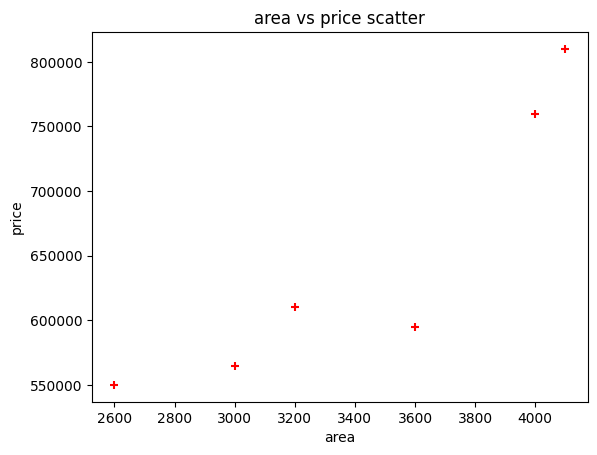

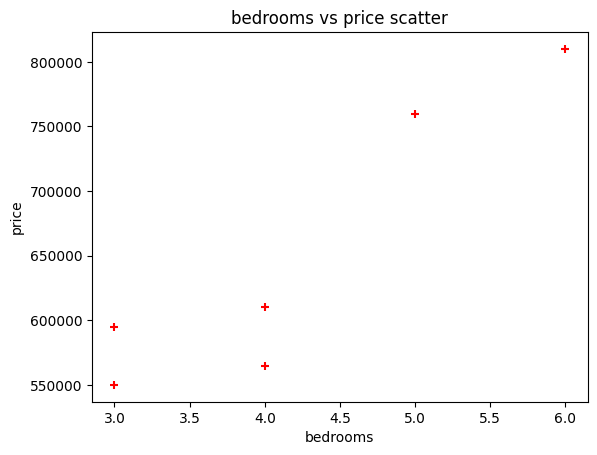

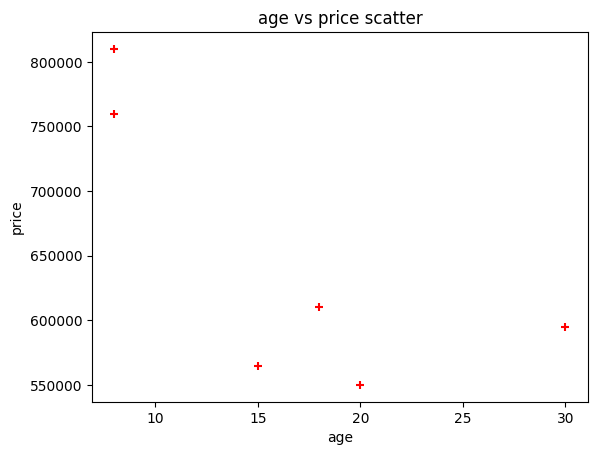

In [39]:
for i in df.columns:
    if i != "price":
        plt.scatter(df[i], df.price, c="r", marker='+')
        plt.xlabel(i)
        plt.ylabel('price')
        plt.title(f"{i} vs price scatter")
        plt.show()